In [19]:
import numpy as np
import matplotlib.pyplot as plt

## 7.1 Convolutional Neural Network in Keras
### NNs have an input layer, an output layer and hidden layers in between. Each hidden layer has a weight associated with it, and the whole point is to learn those weights and to move from layer to layer to arrive at the output. Remember how the weights were learned in Linear Regression. It's the same idea here but we have a series of weighted sum instead of just one. And there's an extra trick (where the non-linearity arises): a non-linear function -- typically $arctanh$ or $relu$ is made to act on the result.
### CNNs are often used in image analysis, where the Convolution part comes from a fourier multiplication between pixels and a kernel.
#### All of this is done in https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

In [30]:
from keras.datasets import mnist #download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### mnist is a popular dataset of handwritten digits 0-9. We have 60000 images that we will use to train. And then, with our fits, we will predict the digit written in the 10000 test images. Each image is 28x28
### This is going to be an example of supervised learning, because we have trained data with known answers. 

In [31]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


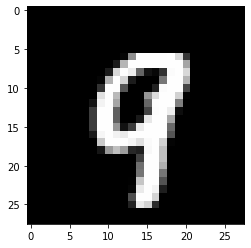

In [32]:
plt.figure()
plt.imshow(X_train[800], cmap = 'gray');

In [33]:
print(y_train[800])

9


### As a pre-processing step, it is useful to use binary. And so, instead of having "5" as the answer of the 1st training image, for e.g. We will have a bunch of 0s and only at the 5th index will we have a 1 to denote that's the label. 

In [14]:
from keras.utils import to_categorical

#reshape
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

#"one-hot" encoding of target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Now we build the model. The activation function used is "relu" which is $f(x) = max(x, 0)$

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten#create model

model = Sequential() #add model layers (2 layers):
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) #input is 28x28x1 (1 because grayscale channel)
model.add(Conv2D(32, kernel_size=3, activation='relu'))

model.add(Flatten())model = Sequential() #add model layers (2 layers):
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) #input is 28x28x1 (1 because grayscale channel)
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Dense(10, activation='softmax')) #we have 10 nodes for 10 outputs
    #softmax so the output can be interpreted as probabilities

### Now, compile

In [18]:
#adam is an example of a Stochastic Gradient Descent Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#smaller learning rate will make it slower but more accurate
#the smaller the loss, the more accurate.

### Train

In [19]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 82s 43ms/step - loss: 0.2169 - accuracy: 0.9524 - val_loss: 0.0966 - val_accuracy: 0.9698
Epoch 2/3
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0688 - accuracy: 0.9790 - val_loss: 0.0752 - val_accuracy: 0.9761
Epoch 3/3
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0481 - accuracy: 0.9840 - val_loss: 0.0875 - val_accuracy: 0.9748


### Done! Now let's predict

In [25]:
print(model.predict(X_test[:5]))
print(y_test[:5])

1/1 [==============================] - 0s 34ms/step
[[2.5016367e-10 1.7119987e-17 2.4840585e-10 4.1237112e-08 5.0868696e-16
  2.6749590e-12 1.4005578e-18 1.0000000e+00 5.8750858e-09 8.4645740e-10]
 [9.3641664e-11 5.3744822e-07 9.9999940e-01 4.1546874e-12 6.6731606e-15
  2.8322483e-14 3.4235079e-09 5.7296252e-16 5.0500361e-08 3.5722347e-14]
 [1.3637735e-06 9.9988139e-01 1.6145647e-06 2.8155444e-08 1.0388646e-04
  1.3461174e-06 1.1769689e-06 4.8411960e-07 8.7926346e-06 2.1077762e-08]
 [9.9999952e-01 2.2332880e-13 1.1350831e-09 2.9767022e-11 2.1316779e-12
  1.5837194e-10 3.8822523e-07 1.7208802e-09 2.9813991e-09 1.2696590e-07]
 [4.4654778e-09 1.5437983e-10 1.0725756e-09 1.0166166e-12 9.9993420e-01
  4.2438057e-11 1.7968538e-12 2.6267069e-09 1.1138517e-10 6.5764536e-05]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### Predictions for first 5: 8, 3, 2, 1, 5. Actual results: 8, 3, 2, 1, 5

## 7.2. Classifier using Keras

#### Can be followed here: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
### where we predict if a patient has diabetes or not based on: 
    Number of times pregnant
    Plasma glucose concentration at 2 hours in an oral glucose tolerance test
    Diastolic blood pressure (mm Hg)
    Triceps skin fold thickness (mm)
    2-hour serum insulin (mu U/ml)
    Body mass index (weight in kg/(height in m)^2)
    Diabetes pedigree function
    Age (years)

In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')

X = dataset[:,0:8]
Y = dataset[:,8]
print('X (risk factors)', X[0,:])
print('Y (result)', Y[0])
print(X.shape, Y.shape)

X (risk factors) [  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
Y (result) 1.0
(768, 8) (768,)


### So we have 8 risk factors (X) and the diagnosis (Y) which is a 1 or a 0. There are 768 patients

In [13]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu')) #8 because of the input
#dense layer (fully connected)
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #sigmoid so the answer lies between 1 and 0

### Compile

In [15]:
#compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit

In [16]:
#if the batch size is small, it will update more often and may be slower. Choose something reasonable
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 3s 5ms/step - loss: 17.8709 - accuracy: 0.6068
Epoch 2/150
77/77 [==============================] - 0s 4ms/step - loss: 5.8590 - accuracy: 0.6289
Epoch 3/150
77/77 [==============================] - 0s 3ms/step - loss: 0.9293 - accuracy: 0.6172
Epoch 4/150
77/77 [==============================] - 0s 3ms/step - loss: 0.7971 - accuracy: 0.6198
Epoch 5/150
77/77 [==============================] - 0s 4ms/step - loss: 0.7485 - accuracy: 0.6042
Epoch 6/150
77/77 [==============================] - 0s 5ms/step - loss: 0.7128 - accuracy: 0.6341
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.6315
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6641
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6615
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6654
Epoch 11

77/77 [==============================] - 0s 4ms/step - loss: 0.5261 - accuracy: 0.7357
Epoch 84/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5234 - accuracy: 0.7435
Epoch 85/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.7240
Epoch 86/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5149 - accuracy: 0.7513
Epoch 87/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5175 - accuracy: 0.7539
Epoch 88/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5151 - accuracy: 0.7526
Epoch 89/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5096 - accuracy: 0.7461
Epoch 90/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5185 - accuracy: 0.7318
Epoch 91/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5049 - accuracy: 0.7500
Epoch 92/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5407 - accuracy: 0.7161
Epoch 93/150


### Prediction on some random patient: 
#### 39.6% chance of having diabetes according to this model

In [34]:
Xt = np.array([0., 150., 80., 40., 0, 25., 0.6, 27.])
Xt = Xt.reshape((1,8))
pred = model.predict(Xt)
print(pred[0][0])

1/1 [==============================] - 0s 40ms/step
0.39638242
